# 1. Make a binary classification dataset with scikit-learn make_moons() function 

* For consistency, the dataset should have 1000 samples and a random_state=42
* Turn the data into Pytorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing. 



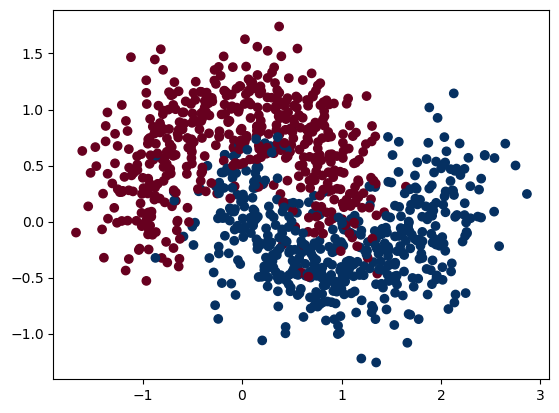

In [36]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 

n_sample = 1000
X, y = make_moons(n_samples = n_sample,
                 noise=0.3,
                 random_state = 42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdBu)

In [37]:
import torch 
from sklearn.model_selection import train_test_split 

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train , y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2,
                                                    random_state=42)


X_train[:5], y_train[:5]

(tensor([[ 2.2360,  0.4705],
         [-1.3513,  0.4264],
         [-0.2783,  1.2589],
         [-0.0367,  0.9797],
         [ 0.4039, -0.1033]]),
 tensor([1., 0., 0., 0., 1.]))

In [38]:

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [59]:
from torch import nn 
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.Softmax = nn.Softmax()
        
        
    def forward(self,x):
        return self.layer_3(self.Softmax(self.layer_2(self.layer_1(x))))
    
    
    
model_3 = CircleModelV0().to(device)
print(model_3)

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (Softmax): Softmax(dim=None)
)


In [60]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.1)

In [61]:
# calculate accuracy (a classification metrics)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()   
    acc = (correct/len(y_pred))*100
    return acc


In [62]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


C:\Users\Aorus PC\AppData\Local\Temp\ipykernel_15528\4182850283.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.layer_3(self.Softmax(self.layer_2(self.layer_1(x))))


Epoch: 0 | Loss: 0.69761, Accuracy: 50.00% | Test Loss: 0.67008, Test Accuracy: 66.00%
Epoch: 100 | Loss: 0.33722, Accuracy: 85.62% | Test Loss: 0.35384, Test Accuracy: 82.50%
Epoch: 200 | Loss: 0.33346, Accuracy: 85.25% | Test Loss: 0.35047, Test Accuracy: 81.00%
Epoch: 300 | Loss: 0.33061, Accuracy: 86.12% | Test Loss: 0.34319, Test Accuracy: 82.50%
Epoch: 400 | Loss: 0.32997, Accuracy: 86.12% | Test Loss: 0.34220, Test Accuracy: 82.50%
Epoch: 500 | Loss: 0.33180, Accuracy: 85.38% | Test Loss: 0.34444, Test Accuracy: 81.00%
Epoch: 600 | Loss: 0.32916, Accuracy: 86.12% | Test Loss: 0.34075, Test Accuracy: 82.50%
Epoch: 700 | Loss: 0.32889, Accuracy: 86.12% | Test Loss: 0.34026, Test Accuracy: 82.50%
Epoch: 800 | Loss: 0.32873, Accuracy: 86.12% | Test Loss: 0.33999, Test Accuracy: 82.50%
Epoch: 900 | Loss: 0.32856, Accuracy: 86.12% | Test Loss: 0.33968, Test Accuracy: 82.50%


In [54]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


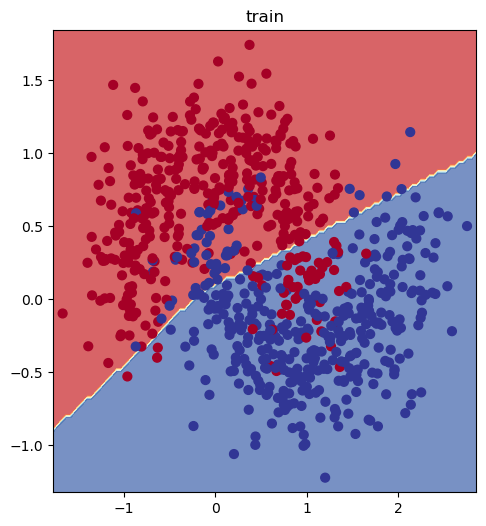

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3, X_train, y_train)

# 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1. 

* To measuere model accurcy , you can create you own accuracy function or use the accuracy function to TorchMatrics.
* Train the model for long enough for it to reach over 96% accuracy. 
* The training loop should output progress every 10 epochs of the the model training and test set loss and accuracy

In [64]:
from torch import nn 
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.Softmax = nn.Softmax()
        
        
    def forward(self,x):
        return self.layer_3(self.Softmax(self.layer_2(self.layer_1(x))))
    
    
    
model_3 = CircleModelV0().to(device)
print(model_3)

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (Softmax): Softmax(dim=None)
)


In [65]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.1)

In [67]:
import torchmetrics




In [ ]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
#       test_acc = accuracy_fn(y_true=y_test,
#                              y_pred=test_pred)


        

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


# CNN exercise

In [2]:
from jupyterthemes import get_themes
import jupyterthemes as jt

from jupyterthemes.stylefx import set_nb_theme

In [3]:
set_nb_theme('gruvboxd')

In [5]:
import torch 
from torch import nn 

# import torchvision 
import torchvision
from torchvision import datasets 
from torchvision.transforms import ToTensor 
import matplotlib.pyplot as plt 




In [14]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [15]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [25]:
import os
import zipfile

from pathlib import Path

import requests

# Setup path to data folder
data_path = Path("food_vision/")
image_path = data_path / "10_food_classes_all_data"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "10_food_classes_all_data.zip", "wb") as f:
        request = requests.get("https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "10_food_classes_all_data.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

    # Remove .zip file
    os.remove(data_path / "10_food_classes_all_data.zip")

food_vision\10_food_classes_all_data directory exists.


In [32]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [33]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'food_vision\10_food_classes_all_data'.
There are 2 directories and 0 images in 'food_vision\10_food_classes_all_data\10_food_classes_all_data'.
There are 10 directories and 0 images in 'food_vision\10_food_classes_all_data\10_food_classes_all_data\test'.
There are 0 directories and 250 images in 'food_vision\10_food_classes_all_data\10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in 'food_vision\10_food_classes_all_data\10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in 'food_vision\10_food_classes_all_data\10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in 'food_vision\10_food_classes_all_data\10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in 'food_vision\10_food_classes_all_data\10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in 'food_vision\10_food_classes_all_data\

In [30]:
# setup train and test paths 
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('food_vision/10_food_classes_all_data/train'),
 WindowsPath('food_vision/10_food_classes_all_data/test'))

In [31]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

IndexError: list index out of range

# learn-transforms

In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt

from jupyterthemes.stylefx import set_nb_theme


set_nb_theme('gruvboxd')

In [2]:

import torch
from torch import nn

import torch.nn.functional as F

In [3]:


def attention(query, key, value):

  # Create the scale factor (sqrt(d_k))
  d_k = torch.sqrt(torch.tensor(query.shape[-1])) # torch.sqrt needs a tensor

  q_k = torch.matmul(query, key.mT) # .mT = matrix Transpose (transposes the last two dimensions)
  q_k_softmax_scale = F.softmax(q_k/torch.sqrt(d_k), dim=-1)
  q_k_softmax_scale_v = torch.matmul(q_k, value)
  return q_k_softmax_scale_v
     

In [4]:

torch.manual_seed(42)
x = torch.randn(3, 3)

output_custom = attention(query=x, key=x, value=x)
output_custom

tensor([[ 1.7361, -0.3428,  0.4193],
        [ 2.7884, -2.2552,  0.2486],
        [12.6584, -4.6864,  2.5056]])

In [5]:


# Does this equal PyTorch's scaled_dot_product_attention?
output_pytorch = F.scaled_dot_product_attention(query=x,
                                                key=x,
                                                value=x)
output_pytorch

tensor([[ 1.1175, -0.5276,  0.2233],
        [ 1.0066, -0.7048,  0.1397],
        [ 1.9621, -0.6285,  0.4030]])

In [6]:


# Should output true
torch.all(output_pytorch.isclose(output_custom))
     

tensor(False)

In [14]:


# TODO: finalize this and upload it to GitHub (if it works)
!wget https://www.dropbox.com/s/8heqlnrpkf7tlbq/cafe_sales_data_csv.xlsx
     

--2023-06-30 22:30:39--  https://www.dropbox.com/s/8heqlnrpkf7tlbq/cafe_sales_data_csv.xlsx
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/8heqlnrpkf7tlbq/cafe_sales_data_csv.xlsx [following]
--2023-06-30 22:30:40--  https://www.dropbox.com/s/raw/8heqlnrpkf7tlbq/cafe_sales_data_csv.xlsx
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc27e74c17652affc563100b0b0e.dl.dropboxusercontent.com/cd/0/inline/B-9cRRaMti-I1NQAk9RHQsQmUmx1QUBfayTEO1mus1daaaXty0K_E9i6UEvA5VdXrJnfqwzOKWQor3D9PWNWE0JC1xPeNlOywp77uKnS-QdPb0JwL5UXgIO01HRnm1FAPoLZq90b8zEOW_nmcfisM7JBEaeeKC_Jxe9ZWcMliB3LOQ/file# [following]
--2023-06-30 22:30:40--  https://uc27e74c17652affc563100b0b0e.dl.dropboxusercontent.com/cd/0/inline/B-9cRRaMti-I1NQAk9RHQsQmUmx1QUBfayTEO1mus1daaaXty0K_E9i6UEvA5VdXrJnfqw

In [17]:

import pandas as pd
df = pd.read_excel("cafe_sales_data_csv.xlsx") # TODO: read_excel with _csv in the filename is confusing...
df
     

,Unnamed: 0,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Coffee,0,50,55,68,91,107,84
1,Bread,0,20,22,25,12,40,49
2,Bacon,0,10,15,20,10,65,39
3,Milk,0,15,15,18,16,51,45
4,Bagel,0,21,8,20,60,56,44
5,Sandwich,0,9,8,50,18,62,50
6,Crossiant,0,11,4,3,7,49,55


In [16]:
# pip install openpyxl

                                              0.0/250.0 kB ? eta -:--:--
                                              0.0/250.0 kB ? eta -:--:--
     ------                                  41.0/250.0 kB 2.0 MB/s eta 0:00:01
     ------                                  41.0/250.0 kB 2.0 MB/s eta 0:00:01
     -------------                         92.2/250.0 kB 871.5 kB/s eta 0:00:01
     ----------------                     112.6/250.0 kB 656.4 kB/s eta 0:00:01
     --------------------                 143.4/250.0 kB 607.9 kB/s eta 0:00:01
     ----------------------               153.6/250.0 kB 541.0 kB/s eta 0:00:01
     ----------------------------         194.6/250.0 kB 562.0 kB/s eta 0:00:01
     ----------------------------         194.6/250.0 kB 562.0 kB/s eta 0:00:01
     --------------------------------     225.3/250.0 kB 509.6 kB/s eta 0:00:01
     ------------------------------------ 250.0/250.0 kB 495.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use update

In [18]:

# Create price vector
price_dict = {
    "coffee": 5,
    "bread": 8,
    "bacon": 15,
    "milk": 4,
    "bagel": 9,
    "sandwich": 12,
    "croissant": 8
}
price_vector = torch.tensor(list(price_dict.values()), dtype=torch.float32)
price_vector
     

tensor([ 5.,  8., 15.,  4.,  9., 12.,  8.])

In [19]:


# Create sales matrix
sales_matrix = torch.tensor(df.drop("Unnamed: 0", axis=1).values, dtype=torch.float32)
sales_matrix

tensor([[  0.,  50.,  55.,  68.,  91., 107.,  84.],
        [  0.,  20.,  22.,  25.,  12.,  40.,  49.],
        [  0.,  10.,  15.,  20.,  10.,  65.,  39.],
        [  0.,  15.,  15.,  18.,  16.,  51.,  45.],
        [  0.,  21.,   8.,  20.,  60.,  56.,  44.],
        [  0.,   9.,   8.,  50.,  18.,  62.,  50.],
        [  0.,  11.,   4.,   3.,   7.,  49.,  55.]])

In [20]:
print(f"Sales: {sales_matrix.shape} (seven products, seven days of week)")
print(f"Prices: {price_vector.shape} (seven products)")

Sales: torch.Size([7, 7]) (seven products, seven days of week)
Prices: torch.Size([7]) (seven products)


In [21]:


# Find the sales per day
price_vector.matmul
(sales_matrix)

tensor([[  0.,  50.,  55.,  68.,  91., 107.,  84.],
        [  0.,  20.,  22.,  25.,  12.,  40.,  49.],
        [  0.,  10.,  15.,  20.,  10.,  65.,  39.],
        [  0.,  15.,  15.,  18.,  16.,  51.,  45.],
        [  0.,  21.,   8.,  20.,  60.,  56.,  44.],
        [  0.,   9.,   8.,  50.,  18.,  62.,  50.],
        [  0.,  11.,   4.,   3.,   7.,  49.,  55.]])

In [22]:


price_vector.unsqueeze(1)

tensor([[ 5.],
        [ 8.],
        [15.],
        [ 4.],
        [ 9.],
        [12.],
        [ 8.]])

In [23]:


price_vector

tensor([ 5.,  8., 15.,  4.,  9., 12.,  8.])

In [24]:


# WRONG: Sales per item per day
price_vector * sales_matrix
     

tensor([[   0.,  400.,  825.,  272.,  819., 1284.,  672.],
        [   0.,  160.,  330.,  100.,  108.,  480.,  392.],
        [   0.,   80.,  225.,   80.,   90.,  780.,  312.],
        [   0.,  120.,  225.,   72.,  144.,  612.,  360.],
        [   0.,  168.,  120.,   80.,  540.,  672.,  352.],
        [   0.,   72.,  120.,  200.,  162.,  744.,  400.],
        [   0.,   88.,   60.,   12.,   63.,  588.,  440.]])

In [25]:

# CORRECT: Manipulate price vector before multiplying to sales matrix
price_vector.unsqueeze(1) * sales_matrix

tensor([[  0., 250., 275., 340., 455., 535., 420.],
        [  0., 160., 176., 200.,  96., 320., 392.],
        [  0., 150., 225., 300., 150., 975., 585.],
        [  0.,  60.,  60.,  72.,  64., 204., 180.],
        [  0., 189.,  72., 180., 540., 504., 396.],
        [  0., 108.,  96., 600., 216., 744., 600.],
        [  0.,  88.,  32.,  24.,  56., 392., 440.]])

In [26]:

# TK note:
# matmul = sum over dim=0 -> item sales per day
# manual setup = sum over dim=1 -> item sales per week
total_item_sales_per_week = torch.sum(price_vector.unsqueeze(1) * sales_matrix, dim=1)
total_item_sales_per_week

tensor([2275., 1344., 2385.,  640., 1881., 2364., 1032.])

In [27]:

total_sales_per_day = torch.sum(price_vector.unsqueeze(1) * sales_matrix, dim=0)
total_sales_per_day

tensor([   0., 1005.,  936., 1716., 1577., 3674., 3013.])

In [28]:

# Create a query ("What are the sales on Wednesday?")
sales_on_wednesday_vector = torch.zeros(7) # days of week
sales_on_wednesday_vector[2] = 1
sales_on_wednesday_vector

tensor([0., 0., 1., 0., 0., 0., 0.])

In [29]:

# Compare the sales matrix (key) to the query (Q * K.T)
wednesday_sales = sales_on_wednesday_vector.matmul(sales_matrix.T)
wednesday_sales

tensor([55., 22., 15., 15.,  8.,  8.,  4.])

In [30]:

F.softmax(wednesday_sales, dim=0)

tensor([1.0000e+00, 4.6589e-15, 4.2484e-18, 4.2484e-18, 3.8740e-21, 3.8740e-21,
        7.0955e-23])

In [31]:


wednesday_sales.shape

torch.Size([7])

In [32]:

F.softmax(wednesday_sales / torch.sqrt(torch.tensor(wednesday_sales.shape[0])), dim=0)

tensor([1.0000e+00, 3.8293e-06, 2.7170e-07, 2.7170e-07, 1.9277e-08, 1.9277e-08,
        4.2507e-09])

In [33]:

F.softmax(wednesday_sales / torch.sqrt(torch.tensor(wednesday_sales.shape[0])), dim=0) @ price_vector

tensor(5.0000)

In [34]:


# Total sales on Wednesday
attention_to_pay_on_wednesdays = wednesday_sales @ price_vector # price_vector = value
attention_to_pay_on_wednesdays
     

tensor(936.)

In [35]:


from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
sales_matrix_normalized = min_max.fit(sales_matrix).transform(sales_matrix)
sales_matrix_normalized
     

array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [0.        , 0.26829268, 0.35294118, 0.33846154, 0.05952381,
        0.        , 0.22222222],
       [0.        , 0.02439024, 0.21568627, 0.26153846, 0.03571429,
        0.37313433, 0.        ],
       [0.        , 0.14634146, 0.21568627, 0.23076923, 0.10714286,
        0.1641791 , 0.13333333],
       [0.        , 0.29268293, 0.07843137, 0.26153846, 0.63095238,
        0.23880597, 0.11111111],
       [0.        , 0.        , 0.07843137, 0.72307692, 0.13095238,
        0.32835821, 0.24444444],
       [0.        , 0.04878049, 0.        , 0.        , 0.        ,
        0.13432836, 0.35555556]])

In [36]:


def min_max_normalize_tensor(x):
  """
  See: https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)
  """

  return (x - torch.min(x)) / (torch.max(x) - torch.min(x))

In [37]:

price_vector

tensor([ 5.,  8., 15.,  4.,  9., 12.,  8.])

In [38]:


sales_matrix_normalized = min_max_normalize_tensor(sales_matrix)
price_vector_normalized = min_max_normalize_tensor(price_vector)
sales_matrix_normalized, price_vector_normalized
     

(tensor([[0.0000, 0.4673, 0.5140, 0.6355, 0.8505, 1.0000, 0.7850],
         [0.0000, 0.1869, 0.2056, 0.2336, 0.1121, 0.3738, 0.4579],
         [0.0000, 0.0935, 0.1402, 0.1869, 0.0935, 0.6075, 0.3645],
         [0.0000, 0.1402, 0.1402, 0.1682, 0.1495, 0.4766, 0.4206],
         [0.0000, 0.1963, 0.0748, 0.1869, 0.5607, 0.5234, 0.4112],
         [0.0000, 0.0841, 0.0748, 0.4673, 0.1682, 0.5794, 0.4673],
         [0.0000, 0.1028, 0.0374, 0.0280, 0.0654, 0.4579, 0.5140]]),
 tensor([0.0909, 0.3636, 1.0000, 0.0000, 0.4545, 0.7273, 0.3636]))

In [39]:

torch.std(x, dim=0)

tensor([1.1125, 0.6311, 0.3288])

In [40]:


def standardize_tensor(x):
  """
  See: https://en.wikipedia.org/wiki/Feature_scaling#Standardization_(Z-score_Normalization)
  """
  return (x - torch.mean(x)) / torch.std(x)

In [41]:

sales_matrix_standardized = standardize_tensor(sales_matrix)
price_vector_standardized = standardize_tensor(price_vector)
price_vector_standardized
     

tensor([-0.9730, -0.1871,  1.6467, -1.2350,  0.0748,  0.8608, -0.1871])

In [42]:


price_vector

tensor([ 5.,  8., 15.,  4.,  9., 12.,  8.])

In [43]:

# Create a query ("What are the sales on Wednesday?")
sales_on_wednesday_vector = torch.zeros(7) # days of week
sales_on_wednesday_vector[2] = 1
sales_on_wednesday_vector

tensor([0., 0., 1., 0., 0., 0., 0.])

In [44]:
sales_matrix_standardized
     

tensor([[-1.1194,  0.7374,  0.9231,  1.4059,  2.2600,  2.8542,  2.0000],
        [-1.1194, -0.3767, -0.3024, -0.1910, -0.6738,  0.3661,  0.7003],
        [-1.1194, -0.7480, -0.5623, -0.3767, -0.7480,  1.2945,  0.3289],
        [-1.1194, -0.5623, -0.5623, -0.4509, -0.5252,  0.7745,  0.5517],
        [-1.1194, -0.3395, -0.8223, -0.3767,  1.1088,  0.9602,  0.5146],
        [-1.1194, -0.7852, -0.8223,  0.7374, -0.4509,  1.1830,  0.7374],
        [-1.1194, -0.7109, -0.9708, -1.0080, -0.8594,  0.7003,  0.9231]])

In [45]:
F.softmax(sales_on_wednesday_vector.unsqueeze(0).matmul(sales_matrix_standardized.T)/7, dim=1) @ price_vector_standardized

tensor([-0.0365])

In [46]:

F.softmax(sales_on_wednesday_vector.unsqueeze(0).matmul(sales_matrix.T)/7, dim=1) @ price_vector
     

tensor([5.0707])

In [47]:

sales_on_monday = torch.zeros(7)
sales_on_monday[0] = 1
print(sales_on_monday)
F.softmax(sales_on_monday.unsqueeze(0).matmul(sales_matrix.T)/7, dim=1) @ price_vector
     


tensor([1., 0., 0., 0., 0., 0., 0.])


tensor([8.7143])

In [48]:
sales_on_monday = torch.zeros(7)
sales_on_monday[5] = 1
print(sales_on_monday)
F.softmax(sales_on_monday.unsqueeze(0).matmul(sales_matrix_standardized.T)/7, dim=1) @ price_vector_standardized

tensor([0., 0., 0., 0., 0., 1., 0.])


tensor([-0.0193])

In [49]:

day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_values = range(0, 7)
day_dict = dict(zip(day_values, day_names))
day_dict

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [50]:


# Non-standardize
for i in range(7):
  day_tensor = torch.zeros(7)
  day_tensor[i] = 1
  day_name = day_dict[i]

  print(f"\nDay name: {day_name}")
  print(f"Day tensor: {day_tensor}")
  # day_tensor_standardize = standardize_tensor(day_tensor)
  d_k = day_tensor.shape[-1]
  print(d_k)
  attn_score = F.softmax(day_tensor.unsqueeze(1).matmul(sales_matrix.T)/torch.sqrt(torch.tensor(7)), dim=1) @ price_vector
  print(f"Attention score: {attn_score}")
     


Day name: Monday
Day tensor: tensor([1., 0., 0., 0., 0., 0., 0.])
7


RuntimeError: mat1 and mat2 shapes cannot be multiplied (7x1 and 7x7)

In [51]:


# Standardize
# TODO: does this work for the triangle matrix?
# e.g. triangle down the left to bottom right corner
for i in range(7):
  day_tensor = torch.zeros(7)
  day_tensor[i] = 1
  day_name = day_dict[i]

  print(f"\nDay name: {day_name}")
  print(f"Day tensor: {day_tensor}")
  day_tensor_standardize = standardize_tensor(day_tensor)
  attn_score = F.softmax(day_tensor_standardize.unsqueeze(0).matmul(sales_matrix_standardized.T)/torch.sqrt(torch.tensor(7)), dim=1) @ price_vector_standardized
  print(f"Attention score: {attn_score}")


Day name: Monday
Day tensor: tensor([1., 0., 0., 0., 0., 0., 0.])
Attention score: tensor([0.0979])

Day name: Tuesday
Day tensor: tensor([0., 1., 0., 0., 0., 0., 0.])
Attention score: tensor([-0.0585])

Day name: Wednesday
Day tensor: tensor([0., 0., 1., 0., 0., 0., 0.])
Attention score: tensor([-0.0432])

Day name: Thursday
Day tensor: tensor([0., 0., 0., 1., 0., 0., 0.])
Attention score: tensor([0.1432])

Day name: Friday
Day tensor: tensor([0., 0., 0., 0., 1., 0., 0.])
Attention score: tensor([-0.2104])

Day name: Saturday
Day tensor: tensor([0., 0., 0., 0., 0., 1., 0.])
Attention score: tensor([0.0885])

Day name: Sunday
Day tensor: tensor([0., 0., 0., 0., 0., 0., 1.])
Attention score: tensor([-0.0547])


In [52]:

all_days = torch.eye(7)

attention(query=all_days,
          key=sales_matrix,
          value=price_vector)

tensor([   0., 1005.,  936., 1716., 1577., 3674., 3013.])

In [53]:

all_days = torch.eye(7)
all_days_standardized = standardize_tensor(all_days)

attention(query=all_days_standardized,
          key=sales_matrix_standardized,
          value=price_vector_standardized.unsqueeze(1))

tensor([[ 3.7343],
        [-1.2225],
        [-0.9631],
        [ 2.0362],
        [-4.1864],
        [ 1.7217],
        [-1.1203]])

In [54]:

F.scaled_dot_product_attention(query=all_days_standardized,
                               key=sales_matrix_standardized,
                               value=price_vector_standardized.unsqueeze(1))
     

tensor([[ 0.1000],
        [-0.0623],
        [-0.0458],
        [ 0.1560],
        [-0.2222],
        [ 0.0946],
        [-0.0583]])

In [55]:

standardize_tensor_day = standardize_tensor(sales_on_monday)
standardize_tensor_day

tensor([-0.3780, -0.3780, -0.3780, -0.3780, -0.3780,  2.2678, -0.3780])

In [56]:

# Combine with the key ()
wednesday_sales = sales_on_wednesday_vector.matmul(sales_matrix_standardized.T)
wednesday_sales

tensor([ 0.9231, -0.3024, -0.5623, -0.5623, -0.8223, -0.8223, -0.9708])

In [57]:

# Softmax on the sales (not so blown out! ... once the values were standardized)
wednesday_sales = F.softmax(wednesday_sales, dim=0)
wednesday_sales

tensor([0.4452, 0.1307, 0.1008, 0.1008, 0.0777, 0.0777, 0.0670])

In [58]:

# Scale on the sales
wednesday_sales = wednesday_sales/torch.sqrt(torch.tensor(wednesday_sales.shape[0]))
wednesday_sales

tensor([0.1683, 0.0494, 0.0381, 0.0381, 0.0294, 0.0294, 0.0253])

In [59]:

# Multiply by the value to get the attention
attention_to_pay_on_wednesdays = wednesday_sales @ price_vector_standardized
attention_to_pay_on_wednesdays

tensor(-0.1346)

In [60]:

price_vector_standardized

tensor([-0.9730, -0.1871,  1.6467, -1.2350,  0.0748,  0.8608, -0.1871])

In [61]:

each_day = torch.eye(7)
each_day_standardized = standardize_tensor(each_day)
each_day, each_day_standardized

(tensor([[1., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 0., 1.]]),
 tensor([[ 2.4244, -0.4041, -0.4041, -0.4041, -0.4041, -0.4041, -0.4041],
         [-0.4041,  2.4244, -0.4041, -0.4041, -0.4041, -0.4041, -0.4041],
         [-0.4041, -0.4041,  2.4244, -0.4041, -0.4041, -0.4041, -0.4041],
         [-0.4041, -0.4041, -0.4041,  2.4244, -0.4041, -0.4041, -0.4041],
         [-0.4041, -0.4041, -0.4041, -0.4041,  2.4244, -0.4041, -0.4041],
         [-0.4041, -0.4041, -0.4041, -0.4041, -0.4041,  2.4244, -0.4041],
         [-0.4041, -0.4041, -0.4041, -0.4041, -0.4041, -0.4041,  2.4244]]))

In [62]:

# Attention to pay each day
each_day = torch.ones((7))

def attention(query, key, value):
  d_k = torch.tensor(query.shape[-1]) # torch.sqrt needs a tensor
  print(d_k)
  q_k = F.softmax(torch.matmul(query, key.T)/torch.sqrt(d_k), dim=-1)
  print(q_k.shape)
  return torch.matmul(q_k, value)

attention(query=each_day_standardized,
          key=sales_matrix_standardized,
          value=price_vector_standardized)

tensor(7)
torch.Size([7, 7])


tensor([ 0.1000, -0.0623, -0.0458,  0.1560, -0.2222,  0.0946, -0.0583])

In [63]:


# Attention to pay each day
monday = torch.zeros(7)
monday[0] = 1
monday_standardized = standardize_tensor(monday)
print(monday)
print(monday_standardized)

def attention(query, key, value):
  d_k = torch.tensor(query.shape[-1]) # torch.sqrt needs a tensor
  print(d_k)
  q_k = F.softmax(torch.matmul(query, key.T)/torch.sqrt(d_k), dim=-1)
  print(q_k.shape)
  return torch.matmul(q_k, value)

attention(query=monday_standardized,
          key=sales_matrix_standardized,
          value=price_vector_standardized)

tensor([1., 0., 0., 0., 0., 0., 0.])
tensor([ 2.2678, -0.3780, -0.3780, -0.3780, -0.3780, -0.3780, -0.3780])
tensor(7)
torch.Size([7])


tensor(0.0979)

In [64]:


# Make causal mask, see: https://jaykmody.com/blog/gpt-from-scratch/#causal
additive_mask = torch.triu(
    # torch.ones(x.shape[0], x.shape[0]) * float("inf"),
    torch.ones(x.shape[0], x.shape[0]) * -1e10, # can use -1e10 to prevent nans
    diagonal=1
)

additive_mask

tensor([[ 0.0000e+00, -1.0000e+10, -1.0000e+10],
        [ 0.0000e+00,  0.0000e+00, -1.0000e+10],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])

In [65]:

def attention_with_mask(query, key, value, mask=None):
  d_k = torch.tensor(query.shape[-1]) # torch.sqrt needs a tensor
  q_k = torch.matmul(query, key.T) / torch.sqrt(d_k)
  print(q_k.shape)


  print(f"q_k: {q_k}")

  # Apply attention mask
  if mask is not None:
    q_k = q_k + mask

  print(f"q_k with mask: {q_k}")

  # Softmax
  attn = F.softmax(q_k, dim=-1)

  return torch.matmul(attn, value), attn

attention_with_mask(query=x, key=x, value=x, mask=additive_mask)

torch.Size([3, 3])
q_k: tensor([[ 0.1068, -0.0640,  0.4443],
        [-0.0640,  0.7786,  0.6576],
        [ 0.4443,  0.6576,  3.1733]])
q_k with mask: tensor([[ 1.0677e-01, -1.0000e+10, -1.0000e+10],
        [-6.3953e-02,  7.7860e-01, -1.0000e+10],
        [ 4.4429e-01,  6.5759e-01,  3.1733e+00]])


(tensor([[ 0.3367,  0.1288,  0.2345],
         [ 0.2623, -0.7461, -0.0597],
         [ 1.9621, -0.6285,  0.4030]]),
 tensor([[1.0000, 0.0000, 0.0000],
         [0.3010, 0.6990, 0.0000],
         [0.0570, 0.0705, 0.8725]]))

In [66]:


small_values = torch.tensor([1, 2, 3], dtype=torch.float32) # need dtype otherwise error
big_values = small_values * 10
huge_values = big_values * 10

small_softmax = F.softmax(small_values, dim=0)
big_softmax = F.softmax(big_values, dim=0)
huge_softmax = F.softmax(huge_values, dim=0)

print(f"Small values: {small_values}\nSmall softmax: {small_softmax}\n")
print(f"Big values: {big_values}\nBig softmax: {big_softmax}\n")
print(f"Huge values: {huge_values}\nHuge softmax: {huge_softmax}\n")

Small values: tensor([1., 2., 3.])
Small softmax: tensor([0.0900, 0.2447, 0.6652])

Big values: tensor([10., 20., 30.])
Big softmax: tensor([2.0611e-09, 4.5398e-05, 9.9995e-01])

Huge values: tensor([100., 200., 300.])
Huge softmax: tensor([0.0000e+00, 3.7835e-44, 1.0000e+00])



tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])


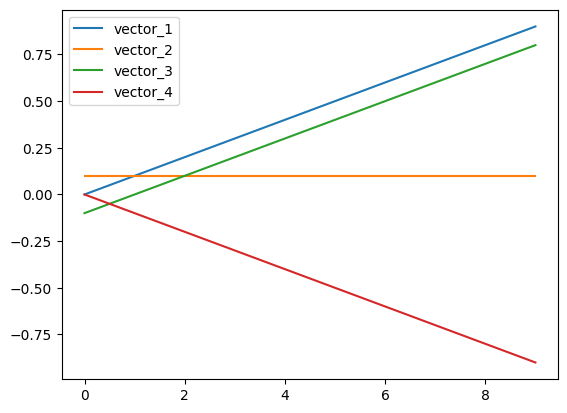

In [67]:


vector_1 = torch.arange(0, 1, 0.1)
vector_2 = torch.ones_like(vector_1) / 10
vector_3 = vector_1 - 0.1
vector_4 = -vector_1
print(vector_2)

import matplotlib.pyplot as plt

plt.plot(vector_1, label="vector_1")
plt.plot(vector_2, label="vector_2")
plt.plot(vector_3, label="vector_3")
plt.plot(vector_4, label="vector_4")
plt.legend();

In [68]:

cosine_sim = nn.CosineSimilarity(dim=0)
cosine_sim(vector_1, vector_1)

tensor(1.0000)

In [69]:

torch.dot(vector_1, vector_1)
     

tensor(2.8500)

In [70]:

torch.dot(vector_1, vector_2)

tensor(0.4500)

In [71]:

torch.dot(vector_1, vector_3)

tensor(2.4000)

In [72]:

torch.dot(vector_2, vector_3)

tensor(0.3500)

In [73]:

torch.dot(vector_1, vector_4)

tensor(-2.8500)

In [74]:

# Sales example (total sales on Wednesday)
torch.dot(price_vector, sales_matrix[:, 2])

tensor(936.)

In [75]:

# Same as taking the multiple and then summing them
torch.sum(price_vector * df["Wednesday"].values, dtype=torch.float32)

tensor(936.)

In [76]:

# Compresses the information into a single number
cosine_sim(price_vector, price_vector)

tensor(1.0000)

In [ ]:
import numpy as np
np.dot(price_vector, price_vector)

In [77]:

# Optionally use the context manager to ensure one of the fused kerenels is run
torch.manual_seed(42)

query = torch.rand(32, 8, 128, 64) # [batch_size, num_heads, sequence_length, embedding_dim]
key = torch.rand(32, 8, 128, 64)
value = torch.rand(32, 8, 128, 64)


In [78]:
output_pytorch = F.scaled_dot_product_attention(query, key, value)
print(output_pytorch.shape)
print(output_pytorch[0, 0, 0])

torch.Size([32, 8, 128, 64])
tensor([0.5430, 0.5479, 0.5143, 0.4744, 0.5149, 0.4867, 0.5063, 0.5088, 0.4863,
        0.4620, 0.4989, 0.5488, 0.4746, 0.4955, 0.5334, 0.4886, 0.5158, 0.5267,
        0.5183, 0.5251, 0.4939, 0.5092, 0.5408, 0.4267, 0.4645, 0.5221, 0.5587,
        0.4917, 0.5142, 0.4762, 0.4839, 0.4837, 0.4937, 0.4671, 0.4898, 0.5195,
        0.4942, 0.4938, 0.4783, 0.4796, 0.5454, 0.4686, 0.5112, 0.5717, 0.5081,
        0.4588, 0.5151, 0.4970, 0.4649, 0.5143, 0.5019, 0.5053, 0.4928, 0.5278,
        0.5332, 0.5121, 0.4882, 0.4992, 0.5197, 0.4865, 0.5028, 0.4908, 0.4975,
        0.4808])


In [79]:

# Does this have learnable parameters?
output_pytorch.requires_grad
     

False

In [80]:

def attention(query, key, value):
  d_k = torch.tensor(query.shape[-1]) # torch.sqrt needs a tensor
  print(torch.matmul(query, key.mT).shape)
  print(key.mT.shape)
  print(key.transpose(-2, -1).shape)

  # tensor.mT is equivalent to tensor.transpose(-2, -1), see: https://pytorch.org/docs/stable/tensors.html#torch.Tensor.mT
  # -> last two dimensions reversed
  q_k = F.softmax(torch.matmul(query, key.mT)/torch.sqrt(d_k), dim=-1)

  print(d_k)

  print(d_k.shape, q_k.shape, value.shape)
  print(q_k.shape, value.mT.shape)

  return torch.matmul(q_k, value)

output_custom = attention(query, key, value)
print(output_pytorch.shape)
# print(output_pytorch[0, 0, 0])
     

torch.Size([32, 8, 128, 128])
torch.Size([32, 8, 64, 128])
torch.Size([32, 8, 64, 128])
tensor(64)
torch.Size([]) torch.Size([32, 8, 128, 128]) torch.Size([32, 8, 128, 64])
torch.Size([32, 8, 128, 128]) torch.Size([32, 8, 64, 128])
torch.Size([32, 8, 128, 64])


In [81]:

# Assert all of the output values are close
assert torch.all(output_custom.isclose(output_pytorch))

In [82]:
class SelfAttentionLearnable(nn.Module):
  def __init__(self, embed_dim):
    super().__init__()
    self.embed_dim = embed_dim
    self.scale = embed_dim ** -0.5 # power of -0.5 == same as square root

    # TK - one option = make one big projection (e.g. embed_dim * 3), then reshape = faster (on bigger GPUs)
    # TK - another option = make one projection per Q, K, V

    # Create a projection (learnable embedding)
    self.qkv = nn.Linear(in_features=embed_dim,
                         out_features=embed_dim * 3, # one per Q, K, V
                         bias=False)

  def forward(self, x):
    B, N, _ = x.shape

    # Do the projection
    qkv = self.qkv(x)
    print(f"qkv shape: {qkv.shape}")

    # qkv = qkv.reshape(B, N, 3, self.embed_dim).permute(1, # qkv
    #                                                    0, # batch
    #                                                    2, # num_tokens
    #                                                    3) # embed_dim

    qkv = qkv.reshape(B, N, 3, self.embed_dim).permute(2, # qkv
                                                       0, # batch
                                                       1, # num_tokens
                                                       3) # embed_dim

    print(f"qkv shape: {qkv.shape}")

    # TODO: replace the above with einops?

    q, k, v = qkv[0], qkv[1], qkv[2]

    print(f"q shape: {q.shape} | k shape: {k.shape} | v shape: {v.shape}")

    # Perform self-attention (self = the operation happens on itself)
    q_k = torch.matmul(q, k.mT)
    print(f"q_k shape: {q_k.shape}")

    q_k_scale = q_k * self.scale

    # Softmax on embedding dim (last dim)
    q_k_scale_softmax = torch.softmax(q_k_scale, dim=-1)

    # Pefrom final batch mm
    q_k_scale_softmax_v = torch.matmul(q_k_scale_softmax, v)

    print(f"q_k_scale_softmax_v output shape: {q_k_scale_softmax_v.shape}")

    # TODO: Try this with einops rearrange
    x = q_k_scale_softmax_v.transpose(1, 2).reshape(B, N, self.embed_dim)

    print(f"x output shape: {x.shape}")

    return x

embed_dim = 512
batch_size = 32
num_tokens = 128
attention_learnable = SelfAttentionLearnable(embed_dim=embed_dim)
x = torch.arange(batch_size*num_tokens*embed_dim, dtype=torch.float32).reshape(batch_size, num_tokens, embed_dim)
print(f"x input shape: {x.shape}")
x_out = attention_learnable(x)

x input shape: torch.Size([32, 128, 512])
qkv shape: torch.Size([32, 128, 1536])
qkv shape: torch.Size([3, 32, 128, 512])
q shape: torch.Size([32, 128, 512]) | k shape: torch.Size([32, 128, 512]) | v shape: torch.Size([32, 128, 512])
q_k shape: torch.Size([32, 128, 128])
q_k_scale_softmax_v output shape: torch.Size([32, 128, 512])
x output shape: torch.Size([32, 128, 512])


In [83]:

# What about einops?
!pip install einops

                                              0.0/42.2 kB ? eta -:--:--
     ---------                                10.2/42.2 kB ? eta -:--:--
     -------------------------------------- 42.2/42.2 kB 507.8 kB/s eta 0:00:00


In [84]:

from einops import rearrange, reduce, repeat

In [85]:
class SelfAttentionLearnable(nn.Module):
  def __init__(self, embed_dim):
    super().__init__()
    self.embed_dim = embed_dim
    self.scale = embed_dim ** -0.5 # power of -0.5 == same as square root

    # Create a projection (learnable embedding) for each input (x -> Q, K, V)
    self.q_projection = nn.Linear(in_features=embed_dim,
                                  out_features=embed_dim,
                                  bias=False)

    self.k_projection = nn.Linear(in_features=embed_dim,
                                  out_features=embed_dim,
                                  bias=False)

    self.v_projection = nn.Linear(in_features=embed_dim,
                                  out_features=embed_dim,
                                  bias=False)

  def forward(self, x):
    B, N, _ = x.shape

    # Do the projection(s)
    q = self.q_projection(x)
    k = self.k_projection(x)
    v = self.v_projection(x)

    print(f"q shape: {q.shape} | k shape: {k.shape} | v shape: {v.shape}")

    # Perform self-attention (self = the operation happens on itself)
    q_k = torch.matmul(q, k.mT)
    print(f"q_k shape: {q_k.shape}")

    q_k_scale = q_k * self.scale

    # Softmax on embedding dim (last dim)
    q_k_scale_softmax = torch.softmax(q_k_scale, dim=-1)

    # Pefrom final batch mm
    q_k_scale_softmax_v = torch.matmul(q_k_scale_softmax, v)

    print(f"q_k_scale_softmax_v output shape: {q_k_scale_softmax_v.shape}")

    # # TODO: Try this with einops rearrange
    # x = q_k_scale_softmax_v.transpose(1, 2).reshape(B, N, self.embed_dim)

    print(f"x output shape: {x.shape}")

    return x

embed_dim = 512
batch_size = 32
num_tokens = 128
attention_learnable = SelfAttentionLearnable(embed_dim=embed_dim)
x = torch.arange(batch_size*num_tokens*embed_dim, dtype=torch.float32).reshape(batch_size, num_tokens, embed_dim)
print(f"x input shape: {x.shape}")
x_out = attention_learnable(x)

x input shape: torch.Size([32, 128, 512])
q shape: torch.Size([32, 128, 512]) | k shape: torch.Size([32, 128, 512]) | v shape: torch.Size([32, 128, 512])
q_k shape: torch.Size([32, 128, 128])
q_k_scale_softmax_v output shape: torch.Size([32, 128, 512])
x output shape: torch.Size([32, 128, 512])


In [86]:
class SelfAttentionLearnableCustom(nn.Module):
  def __init__(self, embed_dim):
    super().__init__()

    self.embed_dim = embed_dim

    # Create scale
    self.scale = embed_dim ** -0.5

    # Create projections
    self.query_projection = nn.Linear(in_features=embed_dim,
                                      out_features=embed_dim,
                                      bias=False)

    self.key_projection = nn.Linear(in_features=embed_dim,
                                    out_features=embed_dim,
                                    bias=False)

    self.value_projection = nn.Linear(in_features=embed_dim,
                                      out_features=embed_dim,
                                      bias=False)

  def forward(self, x):
    query, key, value = self.query_projection(x), self.key_projection(x), self.value_projection(x)

    # Perform scaled_dot_production_attention
    attn = attention(query=query,
                     key=key,
                     value=value)

    return attn

In [87]:
class SelfAttentionLearnablePyTorch(nn.Module):
  def __init__(self, embed_dim):
    super().__init__()

    self.embed_dim = embed_dim

    # Create scale
    self.scale = embed_dim ** -0.5

    # Create projections
    self.query_projection = nn.Linear(in_features=embed_dim,
                                      out_features=embed_dim,
                                      bias=False)

    self.key_projection = nn.Linear(in_features=embed_dim,
                                    out_features=embed_dim,
                                    bias=False)

    self.value_projection = nn.Linear(in_features=embed_dim,
                                      out_features=embed_dim,
                                      bias=False)

  def forward(self, x):
    query, key, value = self.query_projection(x), self.key_projection(x), self.value_projection(x)

    # Perform scaled_dot_production_attention
    attn = F.scaled_dot_product_attention(query=query,
                                          key=key,
                                          value=value)

    return attn

In [88]:
# Make sure the outcomes are the same

torch.manual_seed(42)
self_attention_custom = SelfAttentionLearnableCustom(embed_dim=512)

torch.manual_seed(42)
self_attention_pytorch = SelfAttentionLearnablePyTorch(embed_dim=512)

x = torch.arange(batch_size*num_tokens*embed_dim, dtype=torch.float32).reshape(batch_size, num_tokens, embed_dim)
print(f"x input shape: {x.shape}")

x_out_custom = self_attention_custom(x)

x_out_pytorch = self_attention_pytorch(x)
x_out_custom.shape, x_out_pytorch.shape

x input shape: torch.Size([32, 128, 512])
torch.Size([32, 128, 128])
torch.Size([32, 512, 128])
torch.Size([32, 512, 128])
tensor(512)
torch.Size([]) torch.Size([32, 128, 128]) torch.Size([32, 128, 512])
torch.Size([32, 128, 128]) torch.Size([32, 512, 128])


(torch.Size([32, 128, 512]), torch.Size([32, 128, 512]))

In [89]:

x_out_pytorch[0][0][0]

tensor(104.0217, grad_fn=<SelectBackward0>)

In [90]:

x_out_custom[0][0][0]
     

tensor(104.0217, grad_fn=<SelectBackward0>)

In [91]:

torch.all(x_out_custom.isclose(x_out_pytorch))

tensor(True)

In [92]:

# What about einops?
!pip install einops

In [93]:
from einops import rearrange, reduce, repeat

print(f"Key shape: {key.shape} [batch, num_heads, input_sequence, embedding_dim]")

### The following all do the same ###

# Rearrange the shape for our use case
key_rearranged = rearrange(key, 'batch heads input embed -> batch heads embed input')

# Key tranposed
key_transposed = key.transpose(-2, -1)

# Key mT (note: use .mT rather than .T on tensors with more than two dimensions)
key_mt = key.mT

print(key_rearranged.shape, key_transposed.shape, key_mt.shape)
assert key_rearranged.shape == key_transposed.shape == key_mt.shape

Key shape: torch.Size([32, 8, 128, 64]) [batch, num_heads, input_sequence, embedding_dim]
torch.Size([32, 8, 64, 128]) torch.Size([32, 8, 64, 128]) torch.Size([32, 8, 64, 128])


In [94]:

multi_head_attention_pytorch = torch.nn.MultiheadAttention(embed_dim=512,
                                                           num_heads=8,
                                                           batch_first=True, # Does your batch dimension come first?
                                                           )

attn_output, attn_output_weights = multi_head_attention_pytorch(query=x, key=x, value=x,
                                                                need_weights=True) # Return weights or not
x.shape, attn_output.shape, attn_output_weights.shape

(torch.Size([32, 128, 512]),
 torch.Size([32, 128, 512]),
 torch.Size([32, 128, 128]))

In [95]:

attn_output.requires_grad

True

In [96]:
# TK - embed_dim, num_heads = minimum viable variables (masking can come later)
class MultiheadAttentionCustom(nn.Module):
  def __init__(self,
               embed_dim,
               num_heads,
               # TK - dropout
               ):
    super().__init__()
    self.embed_dim = embed_dim
    self.num_heads = num_heads

    assert embed_dim % num_heads == 0, "Embedding dimension must be divisible by number of heads"

    self.head_dim = embed_dim // num_heads
    self.scale = self.head_dim ** -0.5 # "to the power" is same as squareroot

    self.softmax = nn.Softmax(dim=-1) # perform softmax on embedding dim (last dim)

    # TK - see bias parameter in docs: https://pytorch.org/docs/stable/generated/torch.nn.MultiheadAttention.html
    # "bias – If specified, adds bias to input / output projection layers. Default: True."
    self.query_projection = nn.Linear(embed_dim, embed_dim, bias=True)
    self.key_projection = nn.Linear(embed_dim, embed_dim, bias=True)
    self.value_projection = nn.Linear(embed_dim, embed_dim, bias=True)

    # Project out
    self.project_out = nn.Linear(embed_dim, embed_dim, bias=True)

    # TODO: dropout
    # TODO: masking

  def forward(self, x):
    batch_size, num_tokens, embed_dim = x.shape

    # Project_in (linear)
    query, key, value = self.query_projection(x), self.key_projection(x), self.value_projection(x)

    print(f"Query shape: {query.shape} | Key shape: {key.shape} | Value shape: {value.shape}")

    # Convert to num heads
    query = query.reshape(batch_size, num_tokens, self.num_heads, self.head_dim)
    key = key.reshape(batch_size, num_tokens, self.num_heads, self.head_dim)
    value = value.reshape(batch_size, num_tokens, self.num_heads, self.head_dim)

    print(f"Query shape (heads): {query.shape} | Key shape (heads): {key.shape} | Value shape (heads): {value.shape}")

    # self-attention * heads = softmax(()/d_k))v
    dots = torch.matmul(query, key.mT) * self.scale
    attn = self.softmax(dots)
    out = torch.matmul(attn, value)

    print(f"Out shape: {out.shape}")

    # TODO: dropout

    # Concat last two dims together
    concat = out.reshape(batch_size, num_tokens, embed_dim)
    print(f"Concat shape: {concat.shape}")

    # project_out (linear)
    x_out = self.project_out(concat)
    print(f"Projection out shape: {x_out.shape}")

    return x_out


multihead_attention_custom = MultiheadAttentionCustom(embed_dim=512, num_heads=8)
x_multihead_out_custom = multihead_attention_custom(x)

Query shape: torch.Size([32, 128, 512]) | Key shape: torch.Size([32, 128, 512]) | Value shape: torch.Size([32, 128, 512])
Query shape (heads): torch.Size([32, 128, 8, 64]) | Key shape (heads): torch.Size([32, 128, 8, 64]) | Value shape (heads): torch.Size([32, 128, 8, 64])
Out shape: torch.Size([32, 128, 8, 64])
Concat shape: torch.Size([32, 128, 512])
Projection out shape: torch.Size([32, 128, 512])


In [97]:

x = torch.arange(batch_size*num_tokens*embed_dim, dtype=torch.float32).reshape(batch_size, num_tokens, embed_dim)
print(f"x input shape: {x.shape}")

torch.manual_seed(42)
multi_head_attention_pytorch = torch.nn.MultiheadAttention(embed_dim=512,
                                                           num_heads=8,
                                                           batch_first=True, # Does your batch dimension come first?
                                                           )


torch.manual_seed(42)
multihead_attention_custom = MultiheadAttentionCustom(embed_dim=512, num_heads=8)


x_attn_output_pytorch, attn_output_weights = multi_head_attention_pytorch(query=x, key=x, value=x,
                                                                need_weights=True) # Return weights or not

x_multihead_out_custom = multihead_attention_custom(x)
     

x input shape: torch.Size([32, 128, 512])
Query shape: torch.Size([32, 128, 512]) | Key shape: torch.Size([32, 128, 512]) | Value shape: torch.Size([32, 128, 512])
Query shape (heads): torch.Size([32, 128, 8, 64]) | Key shape (heads): torch.Size([32, 128, 8, 64]) | Value shape (heads): torch.Size([32, 128, 8, 64])
Out shape: torch.Size([32, 128, 8, 64])
Concat shape: torch.Size([32, 128, 512])
Projection out shape: torch.Size([32, 128, 512])


In [98]:
print(x_attn_output_pytorch.shape), print(x_multihead_out_custom.shape)

torch.Size([32, 128, 512])
torch.Size([32, 128, 512])


(None, None)

In [99]:

x_attn_output_pytorch[0][0][0], x_multihead_out_custom[0][0][0]

(tensor(16859.5352, grad_fn=<SelectBackward0>),
 tensor(-68.8901, grad_fn=<SelectBackward0>))

In [100]:
# TK - make sure these are close
torch.all(x_attn_output_pytorch.isclose(x_multihead_out_custom))
     

tensor(False)